***
Copyright 2021 Novartis Institutes for BioMedical Research Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
***

# Profile-QSAR performance

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
pqsar_summary = '../chembl_28/Summary_pQSAR/SummaryPQSAR.csv'

In [4]:
df = pd.read_csv(pqsar_summary, index_col=0, header=0, sep=',')

In [10]:
df.head(2)

,R^2_RF(ext),Count(molecules),R^2_RF(random),Actives(>=6),pIC50_min,pIC50_max,STD(pIC50),R2ext,NV,Q2orig,...,assay_type,site_name,target_type,pref_name,organism,assay_organism,assay_strain,assay_tissue,assay_cell_type,confidence_score
AssayID,,,,,,,,,,,,,,,,,,,,,
CHEMBL1000361,0.63,63,0.46,50,4.46,8.70,0.83,0.56,2,0.37,...,B,"Serine/threonine-protein kinase Chk1 , Pkinase...",SINGLE PROTEIN,Serine/threonine-protein kinase Chk1,Homo sapiens,--,--,--,--,8
CHEMBL1000710,0.37,81,0.54,69,5.05,7.92,0.62,0.34,3,0.59,...,B,"Serotonin 7 (5-HT7) receptor, 7tm_1 domain",SINGLE PROTEIN,Serotonin 7 (5-HT7) receptor,Homo sapiens,--,--,--,--,8


 ## Key columns in the summary file

* CDS_ID: Assay ID 
* Count(molecules): count (should be >50)
* Actives(>=6): no. actives < 1 uM (should be >6)
* std(pIC50): Standard deviation of assay data, a measure of dynamic range. (should be >0.5)
* R^2_RF(ext): correlation with experiment of single-assay random forest regression model based on realistic test sets for comparison to pQSAR
* R^2_RF(random): correlation with experiment of single-assay random forest regression model based on random split test sets for comparison to pQSAR
* Q2orig: pQSAR 5x cross-validated R2 on random test set. This is good for near analogs of training set (should be >0.3, but less can be OK)
* R2ext: pQSAR R2 on realistic test set. This is most important for novel chemistry (best if >0.3)
* Stdev_pred:  standard deviation of 5.5M predictions used for Z-scaling
* mean_pred:  mean of 5.5M predictions used for Z-scaling


In [5]:
def rank_order_plot(df):
    colors = ['k', 'r', 'b', 'lime', 'y', 'm', 'g']
    font = {'family': 'normal', 'weight': 'normal', 'size': 20}
    matplotlib.rc('font', **font)
    plt.figure(figsize=(9.0, 6.0))
    plt.style.use('seaborn-whitegrid')
    cols_name = list(df.columns)
    for i, col in enumerate(cols_name):
        plt.plot(range(len(df[col])), df[col].sort_values(ascending=False), lw=1.5, linestyle='-', color=colors[i], label=col)

    plt.grid(which='major', axis='both', linestyle='--')
    axes = plt.gca()
    axes.set_ylim(0, 1)
    axes.set_xlim(0, int(len(df) * 1.02))
    axes.legend(loc='best', prop={'size': 12})

    plt.ylabel('$R^2_{ext}$')
    plt.xlabel('ChEMBL ({} assays)'.format(len(df)))
    plt.tight_layout()

In [6]:
def r2_stats(df):
    cols = list(df.columns)
    num = len(df)
    stat = pd.DataFrame(0.0, index=cols, columns = ['%R2ext>0.30', '#R2ext>0.30','median R2ext'])
    for c in cols:
        stat.loc[c, '#R2ext>0.30'] = sum(df[c] >= 0.30)
        stat.loc[c, '%R2ext>0.30'] = sum(df[c] >= 0.30) / num
        stat.loc[c, 'median R2ext'] = df[c].median()
    return(stat)

## Comparing pQSAR(R2ext) with random forest models

In [7]:
df_subset = df[['R^2_RF(ext)', 'R^2_RF(random)', 'Q2orig', 'R2ext']]

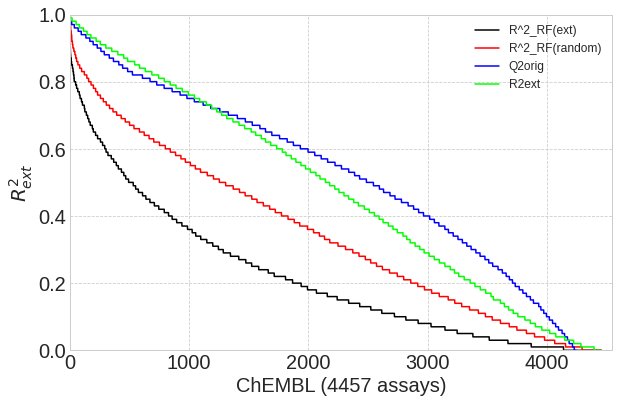

In [8]:
rank_order_plot(df_subset)

In [9]:
r2_stats(df_subset)

,%R2ext>0.30,#R2ext>0.30,median R2ext
R^2_RF(ext),0.288759,1287.0,0.16
R^2_RF(random),0.532421,2373.0,0.32
Q2orig,0.763967,3405.0,0.55
R2ext,0.666592,2971.0,0.48
